### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,BaseEnsemble,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

import seaborn as sns
import missingno as msno

import itertools
from tqdm.notebook import tqdm_notebook
import time

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading Categorical Data

In [2]:
enc_df = pd.read_csv("../Data/Catdf.csv")

In [3]:
models = {
    "XGB GPU": XGBClassifier(tree_method="gpu_hist", n_jobs =-1),
    "XGBRF GPU": XGBRFClassifier(tree_method="gpu_hist", n_jobs =-1),
    "XGB": XGBClassifier(n_jobs =-1),
    "XGBRF": XGBRFClassifier(n_jobs =-1),
    "Desicion Tree" : DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNeighbours": KNeighborsClassifier(),
    "SVC": SVC(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier()
}

performance = pd.DataFrame(index = models.keys(), columns =["Accuracy","Precision","Recall", "F1 Score"])


In [4]:
performance["Model Name"] = models.keys()
performance["Model"] = models.items()

### Initiailing DataFrame For Performance Results

In [5]:
performance

,Accuracy,Precision,Recall,F1 Score,Model Name,Model
XGB GPU,NaN,NaN,NaN,NaN,XGB GPU,"(XGB GPU, XGBClassifier(base_score=None, boost..."
XGBRF GPU,NaN,NaN,NaN,NaN,XGBRF GPU,"(XGBRF GPU, XGBRFClassifier(base_score=None, b..."
XGB,NaN,NaN,NaN,NaN,XGB,"(XGB, XGBClassifier(base_score=None, booster=N..."
XGBRF,NaN,NaN,NaN,NaN,XGBRF,"(XGBRF, XGBRFClassifier(base_score=None, boost..."
Desicion Tree,NaN,NaN,NaN,NaN,Desicion Tree,"(Desicion Tree, DecisionTreeClassifier())"
AdaBoost,NaN,NaN,NaN,NaN,AdaBoost,"(AdaBoost, AdaBoostClassifier())"
Bagging Classifier,NaN,NaN,NaN,NaN,Bagging Classifier,"(Bagging Classifier, BaggingClassifier())"
Extra Trees Classifier,NaN,NaN,NaN,NaN,Extra Trees Classifier,"(Extra Trees Classifier, ExtraTreesClassifier())"
Random Forest,NaN,NaN,NaN,NaN,Random Forest,"(Random Forest, RandomForestClassifier())"
KNeighbours,NaN,NaN,NaN,NaN,KNeighbours,"(KNeighbours, KNeighborsClassifier())"


In [16]:
performance.index

Index(['XGB GPU', 'XGBRF GPU', 'XGB', 'XGBRF', 'Desicion Tree', 'AdaBoost',
       'Bagging Classifier', 'Extra Trees Classifier', 'Random Forest',
       'KNeighbours', 'SVC', 'Naive Bayes', 'MLP'],
      dtype='object')

In [6]:
import joblib

In [7]:
X_train,X_test,y_train, y_test = train_test_split(enc_df.drop(columns=["conditions"]),enc_df["conditions"],test_size=0.25,random_state = 66)
for key in tqdm_notebook(models.keys()):
    print(key)         
    model = models[key]           # Fit the classifier model             
    %timeit -r1 model.fit(X_train, y_train)
    joblib.dump(model,f"../Models/{key}.joblib")            # Prediction              
    predictions = model.predict(X_test)            # Calculate Accuracy, Precision and Recall Metrics
    performance["Accuracy"][key] = accuracy_score(predictions, y_test)
    performance["Precision"][key] = precision_score(predictions, y_test, average='macro') 
    performance["Recall"][key] = recall_score(predictions, y_test, average = 'macro')             
    performance["F1 Score"][key] = f1_score(predictions, y_test, average = 'macro') 
    
    display(performance["Accuracy"][key])
    display(performance["F1 Score"][key])
    
    performance.to_csv("../Results/performance.csv")


  0%|          | 0/13 [00:00<?, ?it/s]

XGB GPU
667 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/XGB GPU.joblib']

1.0

1.0

XGBRF GPU
2.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/XGBRF GPU.joblib']

0.9993612264452252

0.9993561291029647

XGB
1.14 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/XGB.joblib']

0.9996806132226126

0.999678597866095

XGBRF
4.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/XGBRF.joblib']

0.9993612264452252

0.9993561291029647

Desicion Tree
46.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


['../Models/Desicion Tree.joblib']

1.0

1.0

AdaBoost
653 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/AdaBoost.joblib']

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4321303098051741

0.28019807815486286

Bagging Classifier
302 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/Bagging Classifier.joblib']

1.0

1.0

Extra Trees Classifier
776 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/Extra Trees Classifier.joblib']

1.0

1.0

Random Forest
1.35 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/Random Forest.joblib']

1.0

1.0

KNeighbours
1.77 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)


['../Models/KNeighbours.joblib']

0.4682210156499521

0.45854192391089454

SVC
5.93 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/SVC.joblib']

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.10507824976045992

0.03589553837669996

Naive Bayes
4.67 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


['../Models/Naive Bayes.joblib']

0.9993612264452252

0.999201855515383

MLP
2.73 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


['../Models/MLP.joblib']

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.37016927499201535

0.26755983600706773

In [8]:
performance

,Accuracy,Precision,Recall,F1 Score,Model Name,Model
XGB GPU,1.0,1.0,1.0,1.0,XGB GPU,"(XGB GPU, XGBClassifier(base_score=0.5, booste..."
XGBRF GPU,0.999361,0.99914,0.999579,0.999356,XGBRF GPU,"(XGBRF GPU, XGBRFClassifier(base_score=0.5, bo..."
XGB,0.999681,0.99957,0.999789,0.999679,XGB,"(XGB, XGBClassifier(base_score=0.5, booster='g..."
XGBRF,0.999361,0.99914,0.999579,0.999356,XGBRF,"(XGBRF, XGBRFClassifier(base_score=0.5, booste..."
Desicion Tree,1.0,1.0,1.0,1.0,Desicion Tree,"(Desicion Tree, DecisionTreeClassifier())"
AdaBoost,0.43213,0.333333,0.269732,0.280198,AdaBoost,"(AdaBoost, (DecisionTreeClassifier(max_depth=1..."
Bagging Classifier,1.0,1.0,1.0,1.0,Bagging Classifier,"(Bagging Classifier, (DecisionTreeClassifier(r..."
Extra Trees Classifier,1.0,1.0,1.0,1.0,Extra Trees Classifier,"(Extra Trees Classifier, (ExtraTreeClassifier(..."
Random Forest,1.0,1.0,1.0,1.0,Random Forest,"(Random Forest, (DecisionTreeClassifier(max_fe..."
KNeighbours,0.468221,0.468959,0.468436,0.458542,KNeighbours,"(KNeighbours, KNeighborsClassifier())"


In [9]:
performance = performance[["Accuracy","Precision","Recall","F1 Score"]]

In [10]:
performance["Model"] = performance.index

/tmp/ipykernel_16862/771264771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance["Model"] = performance.index


In [12]:
performance

,Accuracy,Precision,Recall,F1 Score,Model
XGB GPU,1.0,1.0,1.0,1.0,XGB GPU
XGBRF GPU,0.999361,0.99914,0.999579,0.999356,XGBRF GPU
XGB,0.999681,0.99957,0.999789,0.999679,XGB
XGBRF,0.999361,0.99914,0.999579,0.999356,XGBRF
Desicion Tree,1.0,1.0,1.0,1.0,Desicion Tree
AdaBoost,0.43213,0.333333,0.269732,0.280198,AdaBoost
Bagging Classifier,1.0,1.0,1.0,1.0,Bagging Classifier
Extra Trees Classifier,1.0,1.0,1.0,1.0,Extra Trees Classifier
Random Forest,1.0,1.0,1.0,1.0,Random Forest
KNeighbours,0.468221,0.468959,0.468436,0.458542,KNeighbours


### Performance of Different Models

<AxesSubplot:>

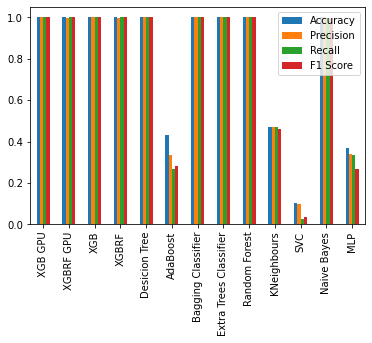

In [11]:
performance.plot(kind="bar")

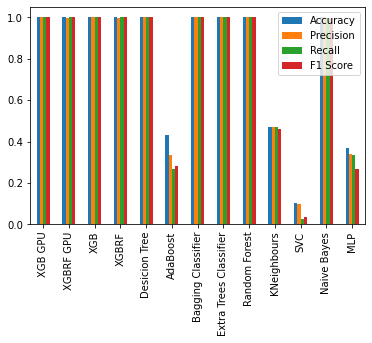

In [15]:
performance.plot(kind="bar").get_figure().savefig("../bar.png")